In [1]:
# Using Feature Combination Approach

In this implementation:


---


***FIRST LAYER***

***CNN Model:*** Train the CNN model using sequences and extract its features.
*   *Input:* Tokenizing and padding the sequences for CNN **(Raw splited data)**
*   *CNN Features:* The output of the dense layer (or the global max-pooling layer) is considered the extracted feature representation of the input text.


---
***SECOND LAYER***

**Combine TF-IDF features with CNN features**

***SVM Model(RBF Kernel):*** Train the SVM model using combined TF-IDF features and cnn features.
*   *Input:* Combined features of TF-IDF and CNN.
*   *SVM features:* Features Extracted using **predict_proba**

***Logistic Regression Model:*** Train the LR model using combined TF-IDF features and cnn features.
*   *Input:* Combined features of TF-IDF and CNN.
*   *LR features:* Features Extracted using **predict_proba**


---

***THIRD(FINAL) LAYER***

**Then Combine SVM features with LR features.**

***Final Model- SVM Model(RBF Kernel):*** Train the final SVM model using Combined features of SVM and LR.



---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import re

In [4]:
# Load datasets
class_0 = pd.read_csv('/content/drive/MyDrive/csv/accident.csv', index_col=[0])
class_1 = pd.read_csv('/content/drive/MyDrive/csv/business.csv', index_col=[0])
# class_2 = pd.read_csv('/content/drive/MyDrive/csv/crime.csv', index_col=[0])
class_3 = pd.read_csv('/content/drive/MyDrive/csv/entertainment.csv', index_col=[0])
# class_4 = pd.read_csv('/content/drive/MyDrive/csv/general.csv', index_col=[0])
# class_5 = pd.read_csv('/content/drive/MyDrive/csv/healthcare.csv', index_col=[0])
class_6 = pd.read_csv('/content/drive/MyDrive/csv/political.csv', index_col=[0])
# class_7 = pd.read_csv('/content/drive/MyDrive/csv/science-and-tech.csv', index_col=[0])
class_8 = pd.read_csv('/content/drive/MyDrive/csv/sports.csv', index_col=[0])
# class_9 = pd.read_csv('/content/drive/MyDrive/csv/war-protest.csv', index_col=[0])

In [5]:
# Add labels to each class
class_0['label'] = 0
class_1['label'] = 1
# class_2['label'] = 2
class_3['label'] = 3
# class_4['label'] = 4
# class_5['label'] = 5
class_6['label'] = 6
# class_7['label'] = 7
class_8['label'] = 8
# class_9['label'] = 9

In [6]:
# Combine all datasets
# news = pd.concat([class_0, class_1, class_2, class_3, class_4, class_5, class_6, class_7, class_8, class_9])
news = pd.concat([class_0, class_1, class_3, class_6, class_8])

# Define features and labels
X = news['news_articles']
y = news['label']

In [7]:
# Custom stop words and tokenizer
stop_words = stop_words = ['',' ',' ','!','! ','!  ','! !','! ! ','! ! !','?','अरे', 'चैनल्स', 'ये','ही','तुमसे','बार','आप','तुम्हारे','तु','रहा','कुछ','कभी',
              'एक','तुम','होता','नहीं','कितनी','पर','तू','हो','है','क्यों','एप','कर','काम','रहे','बातें','लग','आता','ये चैनल्स','करनी','अपना','पैक्स','चीज़','क्या','अरे ये','करा','मैं',
              'अत','अपना','अपनी','अपने','अभी','अंदर','आदि','आप','इत्यादि','इन','इनका','इन्हीं','इन्हें','इन्हों','इस','इसका','इसकी','इसके','इसमें',
              'इसी','इसे','उन','उनका','उनकी','उनके','उनको','उन्हीं','उन्हें','उन्हों','उस','उसके','उसी','उसे','एक','एवं','एस','ऐसे','और','कई',
              'कर','करता','करते','करना','करने','करें','कहते','कहा','का','काफ़ी','कि','कितना','किन्हें','किन्हों','किया','किर','किस','किसी','किसे','की',
              'कुछ','कुल','के','को','कोई','कौन','कौन','बही','बहुत','बाद','बाला','बिलकुल','भी','भीतर','मगर','मानो','मे','में','यदि','यह','यहाँ','यही',
              'या','यिह','ये','रखें','रहा','रहे','ऱ्वासा','लिए','लिये','लेकिन','व','वग़ैरह','वर्ग','वह','वहाँ','वहीं','वाले','वुह','वे','सकता','सकते','सबसे',
              'सभी','साथ','साबुत','साभ','सारा','से','सो','संग','ही','हुआ','हुई','हुए','है','हैं','हो','होता','होती','होते','होना','होने']
def my_tokenizer(s):
    return s.split(' ')

# TF-IDF Vectorizer
tf = TfidfVectorizer(stop_words=stop_words, tokenizer=my_tokenizer, encoding='utf-8', max_features=100)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=101)

# Transform data using TF-IDF Vectorizer
xtrain_tf = tf.fit_transform(X_train)
xtest_tf = tf.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [41]:
# Tokenizing and padding the sequences for CNN
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100  # Maximum length of sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

vocab_size = len(tokenizer.word_index) + 1

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(100, activation='relu'))

# Extract features using CNN
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train_pad, y_train, epochs=50, batch_size=64, validation_data=(X_test_pad, y_test))

# Get features from the CNN model
cnn_train_features = cnn_model.predict(X_train_pad)
cnn_test_features = cnn_model.predict(X_test_pad)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.1025 - loss: 10.0301 - val_accuracy: 0.2377 - val_loss: 8.8524
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4147 - loss: 7.7384 - val_accuracy: 0.0707 - val_loss: 4.6711
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1532 - loss: 4.1671 - val_accuracy: 0.0707 - val_loss: 4.6148
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1067 - loss: 4.4979 - val_accuracy: 0.0707 - val_loss: 4.6151
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1122 - loss: 4.3705 - val_accuracy: 0.0707 - val_loss: 4.6052
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0742 - loss: 4.5393 - val_accuracy: 0.0707 - val_loss: 4.6052
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0681 - loss: 4.5666 - val_accuracy: 0.0707 - val_loss: 4.6052
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0726 - loss: 4.5433 - val_accuracy: 0.0707 - val_loss: 4.6052
E

In [42]:
# Combine TF-IDF features with CNN features
train_features = np.hstack((xtrain_tf.toarray(), cnn_train_features))
test_features = np.hstack((xtest_tf.toarray(), cnn_test_features))

# Define SVM and Logistic Regression models
svm_model = SVC(kernel='rbf', gamma=0.001, C=1000, probability=True)
logistic_model = LogisticRegression(C=0.085, max_iter=10000, solver='newton-cg')

# Train SVM and Logistic Regression models
svm_model.fit(train_features, y_train)
logistic_model.fit(train_features, y_train)


LogisticRegression(C=0.085, max_iter=10000, solver='newton-cg')

In [43]:
# Predict probabilities using SVM
svm_probs_train = svm_model.predict_proba(train_features)
svm_probs_test = svm_model.predict_proba(test_features)

# Predict probabilities using LR
lr_probs_train = logistic_model.predict_proba(train_features)
lr_probs_test = logistic_model.predict_proba(test_features)

In [44]:
# Combine SVM and LR probabilities/features
y_train_combined = np.hstack((svm_probs_train, lr_probs_train))
y_test_combined = np.hstack((svm_probs_test, lr_probs_test))

In [45]:
final_model = SVC(kernel='rbf', gamma=0.001, C=1000, probability=True)
final_model.fit(y_train_combined, y_train)

SVC(C=1000, gamma=0.001, probability=True)

In [46]:
# Make predictions
y_train_pred = final_model.predict(y_train_combined)
y_test_pred = final_model.predict(y_test_combined)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Training Loss: {cnn_history.history['loss']}")
print(f"Validation Loss: {cnn_history.history['val_loss']}")


Train Accuracy: 0.8913
Test Accuracy: 0.8134
Precision: 0.8147
Recall: 0.8134
F1-score: 0.8139
Training Loss: [9.215620040893555, 6.440915107727051, 4.276578903198242, 4.496885776519775, 4.487895488739014, 4.5469841957092285, 4.5469818115234375, 4.546982765197754, 4.5469818115234375, 4.546980857849121, 4.510693550109863, 4.522731304168701, 4.543400764465332, 4.4986677169799805, 4.445307731628418, 4.475627422332764, 4.5840163230896, 4.581894874572754, 4.581895351409912, 4.581894874572754, 4.581894397735596, 4.581894397735596, 4.5818939208984375, 4.5818939208984375, 4.5818939208984375, 4.5818939208984375, 4.5818939208984375, 4.5818939208984375, 4.5818939208984375, 4.5818939208984375, 4.581893444061279, 4.581893444061279, 4.581893444061279, 4.581893444061279, 4.581893444061279, 4.5818939208984375, 4.5818939208984375, 4.581892967224121, 4.5818939208984375, 4.581892967224121, 4.581894397735596, 4.5818939208984375, 4.5818939208984375, 4.5818939208984375, 4.581893444061279, 4.581893444061279,

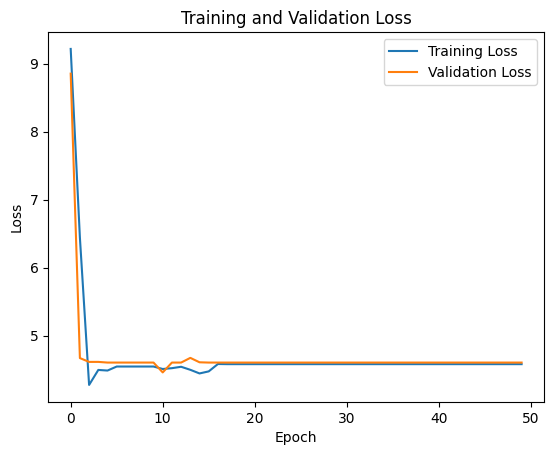

In [47]:
# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


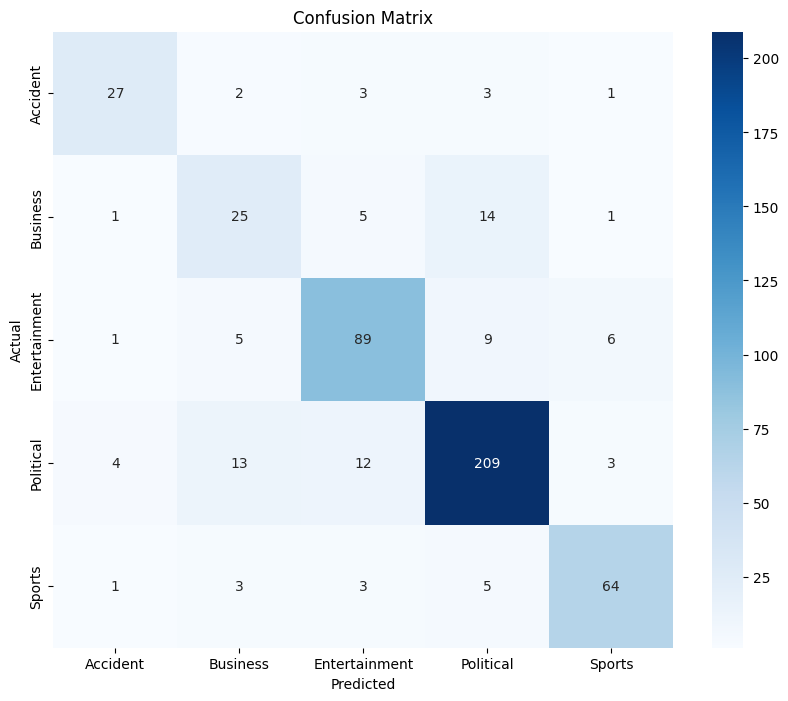

In [48]:
import seaborn as sns
# # Plotting the confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=news['label'].unique(), yticklabels=news['label'].unique())
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# Define class labels for better readability
label_mapping = {
    0: 'Accident',
    1: 'Business',
    3: 'Entertainment',
    6: 'Political',
    8: 'Sports'
}

# Replace numeric labels with string labels
xticks = [label_mapping.get(label, f'Class {label}') for label in sorted(news['label'].unique())]
yticks = [label_mapping.get(label, f'Class {label}') for label in sorted(news['label'].unique())]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=xticks,
            yticklabels=yticks)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.68      0.61        25
           1       0.50      0.15      0.23        34
           3       0.92      0.60      0.73        73
           6       0.72      0.94      0.82       155
           8       0.86      0.83      0.85        53

    accuracy                           0.75       340
   macro avg       0.71      0.64      0.64       340
weighted avg       0.75      0.75      0.73       340

